**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


Data Collection and Data Processing


In [ ]:
sonar_data =pd.read_csv('/content/sonar data.csv',header=None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
#Number of Rows and Columns
sonar_data.shape

(208, 61)

In [ ]:
#Description of the Statistical Measures of the Dataset
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Seperating Data and Labels

In [ ]:
sonar_data.groupby(60).mean()
X=sonar_data.drop(columns=60,axis=1)
Y=sonar_data[60]
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

Training and Test Data

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear'], 'class_weight': [None, 'balanced']}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

train_predictions = best_model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)

test_predictions = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)


In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Data):\n", classification_report(y_test, test_predictions))

Best Hyperparameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy: 0.8916
Test Accuracy: 0.6429

Classification Report (Test Data):
               precision    recall  f1-score   support

           M       0.71      0.55      0.62        22
           R       0.60      0.75      0.67        20

    accuracy                           0.64        42
   macro avg       0.65      0.65      0.64        42
weighted avg       0.66      0.64      0.64        42



Model Accuracy on Untrained Data


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

untrained_data = pd.read_csv('/content/sonar data.csv', header=None)

X_new = untrained_data.iloc[:, :-1]
y_new = untrained_data.iloc[:, -1].map({'R': 0, 'M': 1})

X_new_scaled = scaler.transform(X_new)
y_pred_new = best_model.predict(X_new_scaled)

y_pred_new_mapped = pd.Series(y_pred_new).map({'R': 0, 'M': 1})

accuracy_new = accuracy_score(y_new, y_pred_new_mapped)
print(f"Accuracy on Untrained Data: {accuracy_new:.4f}")
print("Classification Report:", classification_report(y_new, y_pred_new_mapped, target_names=['Rock', 'Mine']))


Accuracy on Untrained Data: 0.7404
Classification Report:               precision    recall  f1-score   support

        Rock       0.66      0.93      0.77        97
        Mine       0.90      0.58      0.70       111

    accuracy                           0.74       208
   macro avg       0.78      0.75      0.74       208
weighted avg       0.79      0.74      0.73       208



Confusion Matrix of the Model


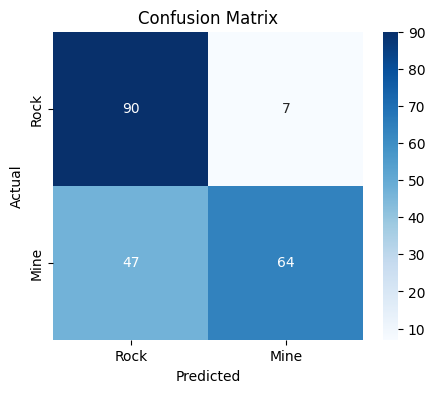

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from google.colab import files

cm = confusion_matrix(y_new, y_pred_new_mapped)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Rock', 'Mine'], yticklabels=['Rock', 'Mine'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()
files.download("confusion_matrix.png")


Accuracy Graph (Training vs. Test Accuracy)

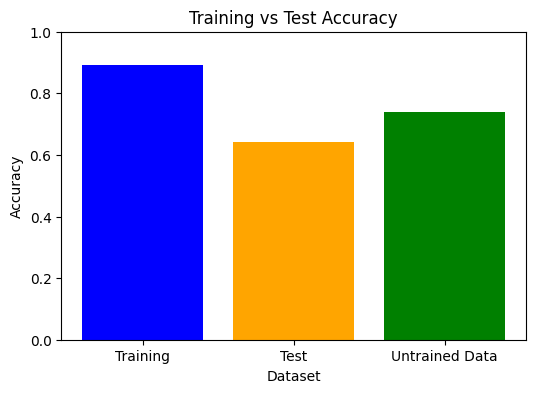

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

plt.figure(figsize=(6, 4))
plt.bar(["Training", "Test", "Untrained Data"], [train_accuracy, test_accuracy, accuracy_new], color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy")
plt.savefig("accuracy_comparison.png")
plt.show()

files.download("accuracy_comparison.png")


Making a Predicting System


In [ ]:
def predict_mine_or_rock(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = best_model.predict(input_scaled)[0]
    result = "Mine" if prediction == 1 else "Rock"
    return result

sample_input = [0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.009, 0.0000]

prediction_result = predict_mine_or_rock(sample_input)
print("The object is predicted to be:", prediction_result)



The object is predicted to be: Rock
